In [6]:
import numpy as np
import matplotlib as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
dataset = pd.read_csv("fraud_dataset.csv")

In [3]:
dataset.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1
2,1,1,0,1,1,3000,0,66,360,1,1,1,1
3,1,1,0,0,1,2583,2358,120,360,1,1,1,1
4,1,0,0,1,0,6000,0,141,360,1,1,1,0
5,1,1,2,1,1,5417,4196,267,360,1,0,1,1
6,1,1,0,0,1,2333,1516,95,360,1,1,1,1
7,1,1,3,1,1,3036,2504,158,360,0,1,2,1
8,1,1,2,1,1,4006,1526,168,360,1,1,1,1
9,1,1,1,1,1,12841,10968,349,360,1,0,2,1


<AxesSubplot:xlabel='Fraud_Risk', ylabel='count'>

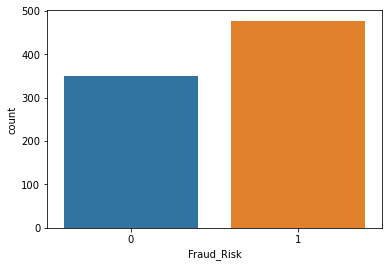

In [7]:
sns.countplot(x="Fraud_Risk",data=dataset)

<AxesSubplot:xlabel='Fraud_Risk', ylabel='count'>

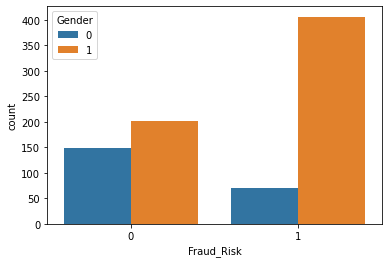

In [8]:
sns.countplot(x="Fraud_Risk",hue="Gender",data=dataset)

In [9]:
dataset.isnull()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,False,False,False,False,False,False,False,False,False,False,False,False,False
823,False,False,False,False,False,False,False,False,False,False,False,False,False
824,False,False,False,False,False,False,False,False,False,False,False,False,False
825,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
dataset.isnull().sum()

Gender                      0
Married                     0
Dependents                  0
Education                   0
Self_Employed               0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Term                   0
Credit_History_Available    0
Housing                     0
Locality                    0
Fraud_Risk                  0
dtype: int64

<AxesSubplot:>

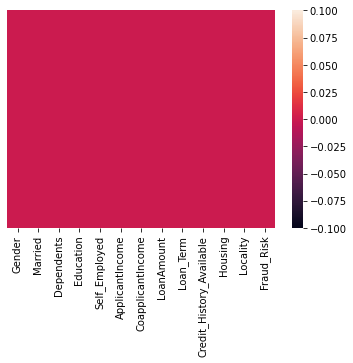

In [14]:
sns.heatmap(dataset.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Fraud_Risk', ylabel='Gender'>

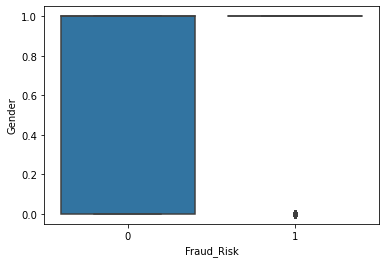

In [15]:
sns.boxplot(x="Fraud_Risk",y="Gender",data=dataset)

In [16]:
dataset.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,1,0,0,1,0,5849,0,146,360,1,1,1,0
1,1,1,1,1,1,4583,1508,128,360,1,1,3,1


In [19]:
dataset.drop(['Gender','Married','Dependents','LoanAmount','Loan_Term','Locality'],axis=1,inplace=True)

In [20]:
dataset.head(2)

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History_Available,Housing,Fraud_Risk
0,1,0,5849,0,1,1,0
1,1,1,4583,1508,1,1,1


In [22]:
X = dataset.drop("Fraud_Risk",axis=1)
y = dataset["Fraud_Risk"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.86      0.79      0.83       111\n           1       0.84      0.90      0.87       138\n\n    accuracy                           0.85       249\n   macro avg       0.85      0.85      0.85       249\nweighted avg       0.85      0.85      0.85       249\n'

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,predictions)

array([[ 88,  23],
       [ 14, 124]], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score

In [38]:
df = accuracy_score(y_test,predictions)*100

In [39]:
display(df)

85.14056224899599